## Day 1 Lecture

Let's begin with a basic task that we know will be successful.

I note I will ask many questions in these comments. I *suggest* you explore them on your own. 

In [1]:
#Think of packages as the "DLC" of Python. We need 2, and are making aliases.
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#We are using pandas to get the data into our computer.
pd.read_csv('sample_data/california_housing_train.csv')
#Note the '' or "" around the text, this means "read the whole thing as one string."

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [3]:
#If we don't save it as an object, it will just print and disappear. :0!
myDataObj = pd.read_csv('sample_data/california_housing_train.csv')

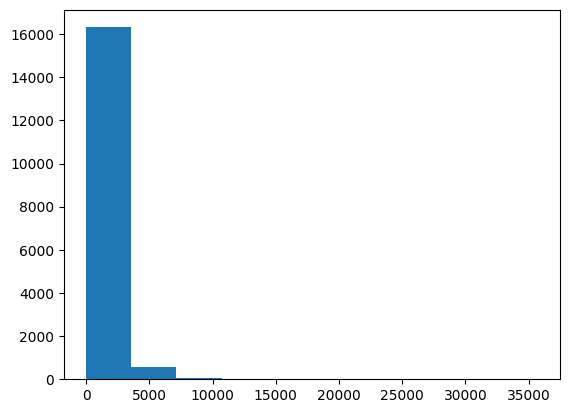

In [4]:
#Let's look at our data in a meaningful way!  This is the histogram command.
myhist = plt.hist(myDataObj['population'])

## Problem Solving


Let's make another plot/graph for a new data set that isn't already in Colab.

How do we get our own data into Python? Drag and Drop into the Menu on the RHS.


In [5]:
titanicData = pd.read_csv('titanic.csv')
titanicData.head()  #What does this command do? Why would I do it? Any guesses as to what titanicData.tail() would do?

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
#Uh oh!
#plt.pie(titanicData['class'])

Hmm... command failed.  This isn't unusual or impossible. Become used to this happening. Response should be, first reading your error message, particularly the end. Then, search for more information.

My search, in order:

1.   pie chart in matplotlib
2.   pie chart string matplotlib
3.   matplotlib pie chart string input  *Worked!


Note the successful search contains the *name of package*, and takes into account the error message I recieved: *Could not convert* **string** *to* **float**. You should be familiar with these bolded terms from your Zybooks readings.

Solution was found here: https://stackoverflow.com/questions/63687789/how-do-i-create-a-pie-chart-using-categorical-data-in-matplotlib

But the solution isn't exactly what I am looking for (different context, etc.) How do we adapt?  **Always modularly test your solutions**   

In [7]:
# Let's test the first part.
# What do you think .groupby('class') does?
# How about .size()?

collapsedTitanic = titanicData.groupby('class').size()
collapsedTitanic

#You will eventually need this groupby function, it is in about 40% of projects.

class
First     216
Second    184
Third     491
dtype: int64

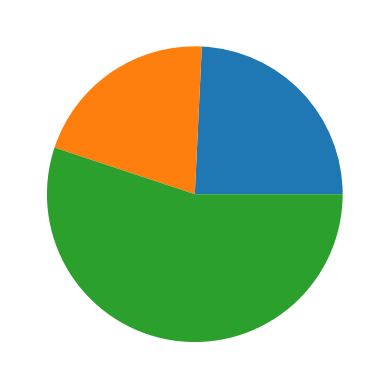

In [8]:
titanicPie = plt.pie(collapsedTitanic)
#No labels using this approach. Checking documentation again.
#Programming with small data operates on a "figure it out" basis. 
#With large data, test everything on a smaller set before you try to "figure it out" on the big one. You only will need to make this mistake once or twice... unless you're paid hourly.

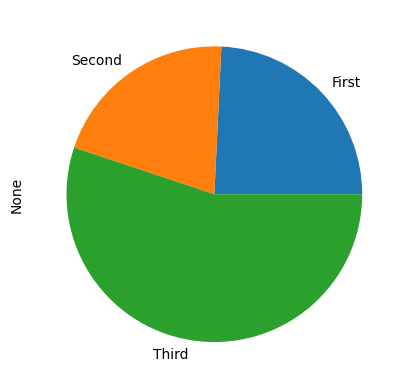

In [9]:
#Alternative method from SO, has partial labels. 
titanicPie = collapsedTitanic.plot(kind = 'pie')

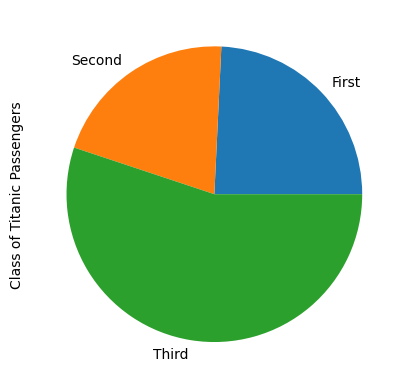

In [10]:
#Adding labels.****
titanicPie = collapsedTitanic.plot(kind = 'pie')
titanicPie = titanicPie.set_ylabel('Class of Titanic Passengers')

That looks good. If this was my personal work, I would now:
1. Go back and clean up my incorrect/bad code. 
2. RERUN everything from the first cell. (Restart Runtime CTRL+M, Run All CTRL+F9)

You will end up with bad code if you only do one cleanup at the end. Why? If you're too tired to do it immediately, you'll be too tired to do it at the end.

More uses of the Groupby command:

In [11]:
#What can I tell from this? Which class would I rather be from?
titanicData.groupby(['survived','class']).size()

survived  class 
0         First      80
          Second     97
          Third     372
1         First     136
          Second     87
          Third     119
dtype: int64

In [12]:
#Why is this better and what did I do?
titanicData.groupby(['survived','class']).size()/titanicData.groupby(['class']).size() * 100
#Always manually check your plan works.

survived  class 
0         First     37.037037
          Second    52.717391
          Third     75.763747
1         First     62.962963
          Second    47.282609
          Third     24.236253
dtype: float64

Do your own groupbys on the titanic data now, and make a new chart of this data (one I haven't shown you).



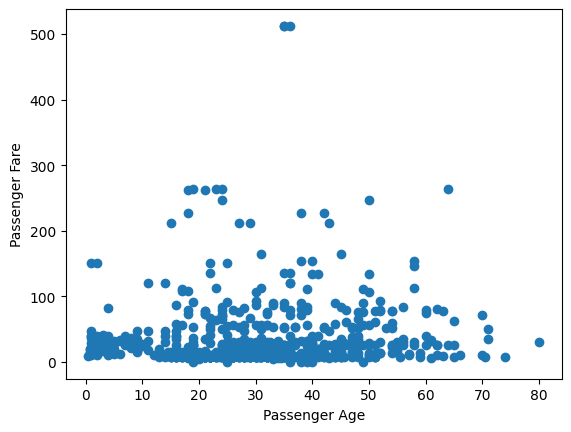

In [13]:
fig, ax = plt.subplots()  #create a plot object with axis
ax.scatter(titanicData['age'], titanicData['fare']) #Tell it what to put on the axis.
ax.set(xlabel = "Passenger Age", ylabel = "Passenger Fare") # tell it what to put on the labels.  
plt.show() #show us the plot.

Great work everyone, don't forget to look at your first project.  
Continue the Zybooks work. 